# HR Analytics 

## Dataset Description :

1. enrollee_id : Unique ID for candidate
2. city: City code
3. city_ development _index : Developement index of the city (scaled)
4. gender: Gender of candidate
5. relevent_experience: Relevant experience of candidate
6. enrolled_university: Type of University course enrolled if any
7. education_level: Education level of candidate
8. major_discipline :Education major discipline of candidate
9. experience: Candidate total experience in years
10. company_size: No of employees in current employer's company
11. company_type : Type of current employer
12. lastnewjob: Difference in years between previous job and current job
13. training_hours: training hours completed
14. target: 0 – Not looking for job change, 1 – Looking for a job change

## Importing essential Libraries

In [1]:
import pandas as pd
import os
import flask
import joblib
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import evalml
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importing Dataset

In [2]:
df_train=pd.read_csv("aug_train.csv")
df_train.head(15)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


# EDA & Feature Engg. & Handling Missing Values

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df_train["enrollee_id"].nunique()

19158

In [5]:
df_train.drop("enrollee_id",axis=1,inplace=True)

In [6]:
df_train.head(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
df_train['training_hours']=df_train['training_hours'].astype('float')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(3), object(10)
memory usage: 1.9+ MB


In [8]:
df_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0.0


In [9]:
df_train.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [10]:
for i in range(len(df_train.index)):
    if df_train['experience'][i] == '>20':
        df_train['experience'][i] = '21'
    elif df_train['experience'][i] == '<1':
        df_train['experience'][i] = '0'

In [11]:
df_train['experience'] = df_train['experience'].astype('float')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  float64
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), object(9)
memory usage: 1.9+ MB


In [12]:
df_train["experience"].mean()

10.100141413083328

In [13]:
df_train.describe()

,city_development_index,experience,training_hours,target
count,19158.000000,19093.000000,19158.000000,19158.000000
mean,0.828848,10.100141,65.366896,0.249348
std,0.123362,6.777024,60.058462,0.432647
min,0.448000,0.000000,1.000000,0.000000
25%,0.740000,4.000000,23.000000,0.000000
50%,0.903000,9.000000,47.000000,0.000000
75%,0.920000,16.000000,88.000000,0.000000
max,0.949000,21.000000,336.000000,1.000000


In [14]:
df_train['experience'].fillna(df_train['experience'].mean(), inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19158 non-null  float64
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), object(9)
memory usage: 1.9+ MB


In [16]:
df_train["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [17]:
for i in range(len(df_train.index)):
    if df_train['last_new_job'][i] == '>4':
        df_train['last_new_job'][i] = '5'
    elif df_train['last_new_job'][i] == 'never':
        df_train['last_new_job'][i] = '0'

In [18]:
df_train["last_new_job"]=df_train["last_new_job"].astype('float')
df_train["last_new_job"].fillna(df_train["last_new_job"].mean(), inplace=True)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19158 non-null  float64
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.9+ MB


In [20]:
df_train.head(50)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47.0,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83.0,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8.0,0.0
5,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,1.0,24.0,1.0
6,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,1.0,24.0,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,5.0,18.0,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1.0,46.0,1.0
9,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,5.0,123.0,0.0


In [21]:
df_train.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [22]:
for i in range(len(df_train.index)):
    if df_train['company_size'][i] == '50-99':
        df_train['company_size'][i] = '75'
    elif df_train['company_size'][i] == '<10':
        df_train['company_size'][i] = '9'
    elif df_train['company_size'][i] == '10000+':
        df_train['company_size'][i] = '10001'
    elif df_train['company_size'][i] == '5000-9999':
        df_train['company_size'][i] = '7500'
    elif df_train['company_size'][i] == '1000-4999':
        df_train['company_size'][i] = '3000'
    elif df_train['company_size'][i] == '10/49':
        df_train['company_size'][i] = '30'
    elif df_train['company_size'][i] == '100-500':
        df_train['company_size'][i] = '300'
    elif df_train['company_size'][i] == '500-999':
        df_train['company_size'][i] = '750'

In [23]:
df_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36.0,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,75,Pvt Ltd,5.0,47.0,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83.0,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,0.0,52.0,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,75,Funded Startup,4.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,1.0,42.0,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,4.0,52.0,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,75,Pvt Ltd,4.0,44.0,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,750,Pvt Ltd,2.0,97.0,0.0


In [24]:
df_train["company_size"]=df_train["company_size"].astype('float')
df_train["company_size"].fillna(df_train["company_size"].mean(), inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19158 non-null  float64
 8   company_size            19158 non-null  float64
 9   company_type            13018 non-null  object 
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(6), object(7)
memory usage: 1.9+ MB


In [25]:
df_train.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [26]:
df_train.enrolled_university.isna().sum()

386

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

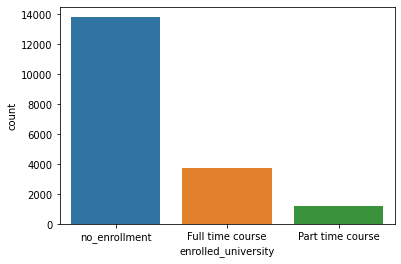

In [27]:
sns.countplot(data=df_train,x='enrolled_university')

In [28]:
df_train['enrolled_university'].fillna('no_enrollment',inplace=True) # Replacing with most frequent value

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

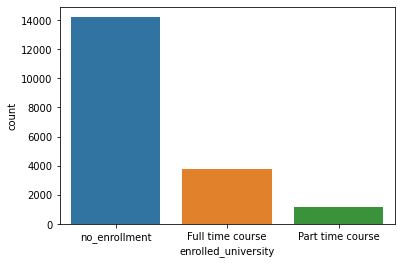

In [29]:
sns.countplot(data=df_train,x='enrolled_university')

In [30]:
df_train.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

<AxesSubplot:xlabel='education_level', ylabel='count'>

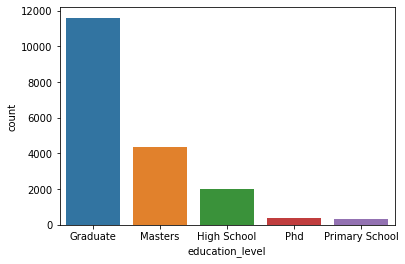

In [31]:
sns.countplot(data=df_train,x='education_level')

In [32]:
df_train.education_level.isna().sum()

460

In [33]:
df_train['education_level'].fillna('Graduate',inplace=True) # Replacing with most frequent value

In [34]:
df_train.major_discipline.isna().sum()

2813

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

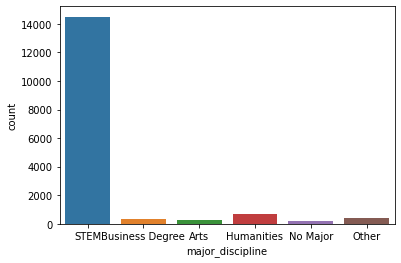

In [35]:
sns.countplot(data=df_train,x='major_discipline')

In [36]:
df_train['major_discipline'].fillna('STEM',inplace=True) # Replacing with most frequent value

In [37]:
df_train.company_type.isna().sum()

6140

<AxesSubplot:xlabel='company_type', ylabel='count'>

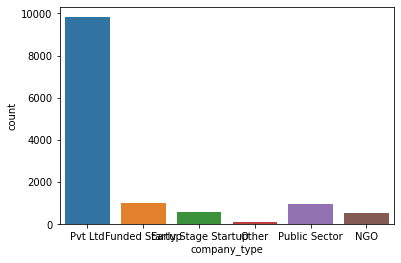

In [38]:
sns.countplot(data=df_train,x='company_type')

In [39]:
df_train['company_type'].fillna('Do_not_know', inplace=True) # Making a new type since a large chunk is missing

<AxesSubplot:xlabel='company_type', ylabel='count'>

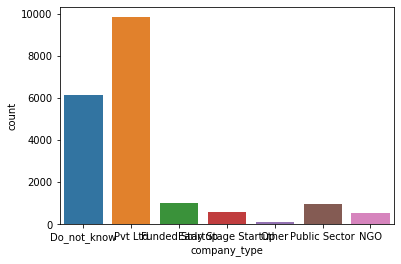

In [40]:
sns.countplot(data=df_train,x='company_type')

In [41]:
df_train.gender.isna().sum()

4508

In [42]:
df_train.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

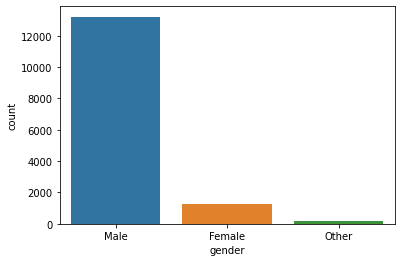

In [43]:
sns.countplot(data=df_train,x='gender')

In [44]:
count=0
for i in range(len(df_train.index)):
    if df_train['target'][i]==1 and df_train['gender'][i]=='Female':
        count=count+1
print(count)

326


In [45]:
df_train.gender.fillna('NaN',inplace=True)

In [46]:
for i in range(len(df_train.index)):
    if df_train['target'][i]==1 and df_train['gender'][i]=='NaN':
        df_train['gender'][i]='Male'
    elif df_train['target'][i]==0 and df_train['gender'][i]=='NaN':
        df_train['gender'][i]='Female' 

In [47]:
df_train.gender.isna().sum()

0

<AxesSubplot:xlabel='gender', ylabel='count'>

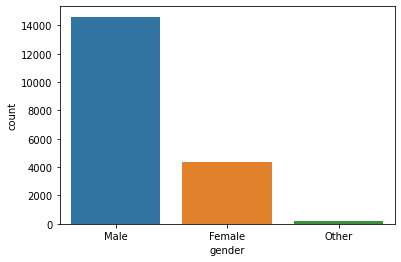

In [48]:
sns.countplot(data=df_train,x='gender')

In [49]:
df_train.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     19158 non-null  object 
 5   education_level         19158 non-null  object 
 6   major_discipline        19158 non-null  object 
 7   experience              19158 non-null  float64
 8   company_size            19158 non-null  float64
 9   company_type            19158 non-null  object 
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(6), object(7)
memory usage: 1.9+ MB


## Label Encoding

In [51]:
retarget = {'Male': 1,
           'Female': 2, 
            'Other': 0
           }
df_train['gender'] = df_train['gender'].map(retarget)

In [52]:
df_train["gender"]=df_train["gender"].astype('float')

In [53]:
df_train.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [54]:
retarget = ['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_146', 'city_133', 'city_126', 'city_118',
       'city_9', 'city_167', 'city_27', 'city_84', 'city_54', 'city_39',
       'city_79', 'city_76', 'city_77', 'city_81', 'city_131', 'city_44',
       'city_117', 'city_155', 'city_33', 'city_141', 'city_127',
       'city_62', 'city_53', 'city_25', 'city_2', 'city_69', 'city_120',
       'city_111', 'city_30', 'city_1', 'city_140', 'city_179', 'city_55',
       'city_14', 'city_42', 'city_107', 'city_18', 'city_139',
       'city_180', 'city_166', 'city_121', 'city_129', 'city_8',
       'city_31', 'city_171'
           ]

c=0
retarget_f={}
for i in retarget:
    retarget_temp={
        i : c
    }
    retarget_f.update(retarget_temp)
    c=c+1

df_train['city'] = df_train['city'].map(retarget_f)

In [55]:
df_train["city"]=df_train["city"].astype('float')

In [56]:
df_train.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [57]:
retarget = {'Has relevent experience': 1,
           'No relevent experience': 0,
           }
df_train['relevent_experience'] = df_train['relevent_experience'].map(retarget)

In [58]:
df_train["relevent_experience"]=df_train["relevent_experience"].astype('float')

In [59]:
df_train.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [60]:
retarget = {'no_enrollment': 2,
           'Full time course': 1, 
            'Part time course': 0
           }
df_train['enrolled_university'] = df_train['enrolled_university'].map(retarget)

In [61]:
df_train["enrolled_university"]=df_train["enrolled_university"].astype('float')

In [62]:
df_train.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [63]:
retarget = {'Graduate': 2,
           'Masters': 3, 
            'High School': 1,
            'Phd': 4,
            'Primary School': 0
           }
df_train['education_level'] = df_train['education_level'].map(retarget)

In [64]:
df_train["education_level"]=df_train["education_level"].astype('float')

In [65]:
df_train.major_discipline.unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [66]:
retarget = {'STEM': 5,
           'Business Degree': 4, 
            'Arts': 3,
            'Humanities': 2,
            'No Major': 0,
            'Other': 1,
           }
df_train['major_discipline'] = df_train['major_discipline'].map(retarget)

In [67]:
df_train["major_discipline"]=df_train["major_discipline"].astype('float')

In [68]:
df_train.company_type.unique()

array(['Do_not_know', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Other', 'Public Sector', 'NGO'], dtype=object)

In [69]:
retarget = {'Do_not_know': 0,
           'Pvt Ltd': 6, 
            'Funded Startup': 4,
            'Early Stage Startup': 3,
            'Other': 1,
            'Public Sector': 5,
            'NGO': 2,
           }
df_train['company_type'] = df_train['company_type'].map(retarget)

In [70]:
df_train["company_type"]=df_train["company_type"].astype('float')

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  float64
 1   city_development_index  19158 non-null  float64
 2   gender                  19158 non-null  float64
 3   relevent_experience     19158 non-null  float64
 4   enrolled_university     19158 non-null  float64
 5   education_level         19158 non-null  float64
 6   major_discipline        19158 non-null  float64
 7   experience              19158 non-null  float64
 8   company_size            19158 non-null  float64
 9   company_type            19158 non-null  float64
 10  last_new_job            19158 non-null  float64
 11  training_hours          19158 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(13)
memory usage: 1.9 MB


In [72]:
df_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.0,0.920,1.0,1.0,2.0,2.0,5.0,21.0,2277.964902,0.0,1.0,36.0,1.0
1,1.0,0.776,1.0,0.0,2.0,2.0,5.0,15.0,75.000000,6.0,5.0,47.0,0.0
2,2.0,0.624,2.0,0.0,1.0,2.0,5.0,5.0,2277.964902,0.0,0.0,83.0,0.0
3,3.0,0.789,1.0,0.0,2.0,2.0,4.0,0.0,2277.964902,6.0,0.0,52.0,1.0
4,4.0,0.767,1.0,1.0,2.0,3.0,5.0,21.0,75.000000,4.0,4.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,35.0,0.878,1.0,0.0,2.0,2.0,2.0,14.0,2277.964902,0.0,1.0,42.0,1.0
19154,0.0,0.920,1.0,1.0,2.0,2.0,5.0,14.0,2277.964902,0.0,4.0,52.0,1.0
19155,0.0,0.920,1.0,1.0,2.0,2.0,5.0,21.0,75.000000,6.0,4.0,44.0,0.0
19156,33.0,0.802,1.0,1.0,2.0,1.0,5.0,0.0,750.000000,6.0,2.0,97.0,0.0


In [73]:
df_train.to_csv("processed_df.csv")

In [74]:
df=pd.read_csv("processed_df.csv")
df.head()

,Unnamed: 0,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,0.0,0.920,1.0,1.0,2.0,2.0,5.0,21.0,2277.964902,0.0,1.0,36.0,1.0
1,1,1.0,0.776,1.0,0.0,2.0,2.0,5.0,15.0,75.000000,6.0,5.0,47.0,0.0
2,2,2.0,0.624,2.0,0.0,1.0,2.0,5.0,5.0,2277.964902,0.0,0.0,83.0,0.0
3,3,3.0,0.789,1.0,0.0,2.0,2.0,4.0,0.0,2277.964902,6.0,0.0,52.0,1.0
4,4,4.0,0.767,1.0,1.0,2.0,3.0,5.0,21.0,75.000000,4.0,4.0,8.0,0.0


In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.0,0.920,1.0,1.0,2.0,2.0,5.0,21.0,2277.964902,0.0,1.0,36.0,1.0
1,1.0,0.776,1.0,0.0,2.0,2.0,5.0,15.0,75.000000,6.0,5.0,47.0,0.0
2,2.0,0.624,2.0,0.0,1.0,2.0,5.0,5.0,2277.964902,0.0,0.0,83.0,0.0
3,3.0,0.789,1.0,0.0,2.0,2.0,4.0,0.0,2277.964902,6.0,0.0,52.0,1.0
4,4.0,0.767,1.0,1.0,2.0,3.0,5.0,21.0,75.000000,4.0,4.0,8.0,0.0


In [77]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

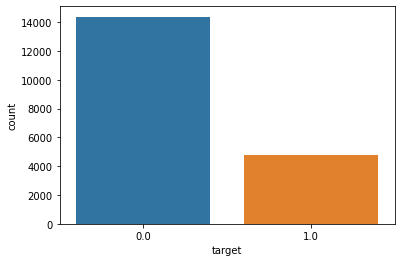

In [78]:
sns.countplot(data=pd.DataFrame(y), x='target')
plt.show()

In [79]:
X, y = SMOTE().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

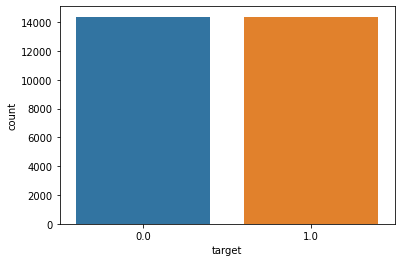

In [80]:
sns.countplot(data=pd.DataFrame(y), x='target')
plt.show()

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:,[1,7,8,10,11]]=scaler.fit_transform(X_train.iloc[:,[1,7,8,10,11]])
X_test.iloc[:,[1,7,8,10,11]]=scaler.transform(X_test.iloc[:,[1,7,8,10,11]])

In [82]:
pd.DataFrame(X_train)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8827,2.0,-1.374794,1.000000,1.000000,1.000000,2.000000,5.000000,-0.508383,-0.681027,6.0,-0.580911,0.228600
17872,6.0,0.902485,1.000000,1.000000,2.000000,2.000000,5.000000,1.009166,-0.001072,0.0,-0.580911,-0.973833
6886,2.0,-1.374794,2.000000,1.000000,2.000000,2.000000,5.000000,-0.204873,-0.758374,6.0,-0.580911,-0.347213
26414,2.0,-1.374794,1.000000,0.064269,1.935731,2.000000,5.000000,-0.944142,-0.526333,6.0,0.736142,-0.809918
25596,0.0,0.902485,1.000000,0.851074,1.851074,2.148926,2.446778,1.031766,-0.001072,0.0,-0.580911,-0.550441
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2.0,-1.374794,1.000000,1.000000,2.000000,2.000000,5.000000,-0.508383,-0.758374,6.0,-0.580911,-0.753669
19648,0.0,0.902485,0.242859,0.757141,2.000000,3.000000,5.000000,1.767940,-0.001072,0.0,0.385237,0.699170
9845,0.0,0.902485,0.000000,1.000000,2.000000,2.000000,5.000000,-0.508383,-0.758374,6.0,-1.218935,-0.279470
10799,2.0,-1.374794,2.000000,0.000000,2.000000,2.000000,5.000000,-1.115403,-0.773843,0.0,-0.580911,0.177793


In [83]:
X_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
8827,2.0,-1.374794,1.000000,1.000000,1.000000,2.000000,5.000000,-0.508383,-0.681027,6.0,-0.580911,0.228600
17872,6.0,0.902485,1.000000,1.000000,2.000000,2.000000,5.000000,1.009166,-0.001072,0.0,-0.580911,-0.973833
6886,2.0,-1.374794,2.000000,1.000000,2.000000,2.000000,5.000000,-0.204873,-0.758374,6.0,-0.580911,-0.347213
26414,2.0,-1.374794,1.000000,0.064269,1.935731,2.000000,5.000000,-0.944142,-0.526333,6.0,0.736142,-0.809918
25596,0.0,0.902485,1.000000,0.851074,1.851074,2.148926,2.446778,1.031766,-0.001072,0.0,-0.580911,-0.550441
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2.0,-1.374794,1.000000,1.000000,2.000000,2.000000,5.000000,-0.508383,-0.758374,6.0,-0.580911,-0.753669
19648,0.0,0.902485,0.242859,0.757141,2.000000,3.000000,5.000000,1.767940,-0.001072,0.0,0.385237,0.699170
9845,0.0,0.902485,0.000000,1.000000,2.000000,2.000000,5.000000,-0.508383,-0.758374,6.0,-1.218935,-0.279470
10799,2.0,-1.374794,2.000000,0.000000,2.000000,2.000000,5.000000,-1.115403,-0.773843,0.0,-0.580911,0.177793


In [84]:
pd.DataFrame(X_test)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
7994,25.000000,-1.944114,1.0,1.0,1.000000,2.000000,5.000000,-0.963648,-0.001072,6.000000,-1.218935,-0.143985
7210,36.000000,0.725534,1.0,1.0,2.000000,3.000000,5.000000,-0.660138,-0.681027,6.000000,-0.580911,-0.127049
9683,2.000000,-1.374794,1.0,0.0,1.000000,2.000000,5.000000,-0.963648,-0.681027,6.000000,0.057113,-0.143985
19993,2.000000,-1.374794,1.0,0.0,1.000000,2.000000,5.000000,-1.003293,-0.001072,6.000000,-1.052253,-0.270621
19066,15.000000,0.825549,1.0,1.0,2.000000,2.000000,0.000000,1.767940,-0.681027,6.000000,-0.580911,-0.990769
...,...,...,...,...,...,...,...,...,...,...,...,...
3911,0.000000,0.902485,2.0,0.0,2.000000,0.000000,5.000000,-0.963648,-0.001072,0.000000,-1.218935,-0.804476
20946,2.000000,-1.374794,1.0,1.0,2.000000,2.000000,5.000000,0.056641,-0.681027,4.723266,-0.580911,-0.933837
23492,2.000000,-1.374794,1.0,1.0,2.000000,2.489462,3.042152,0.405345,-0.001072,0.000000,1.319714,0.211664
3662,36.000000,0.725534,1.0,1.0,2.000000,2.000000,5.000000,-0.356628,-0.681027,6.000000,1.971184,-0.431891


## Visualization & Balancing

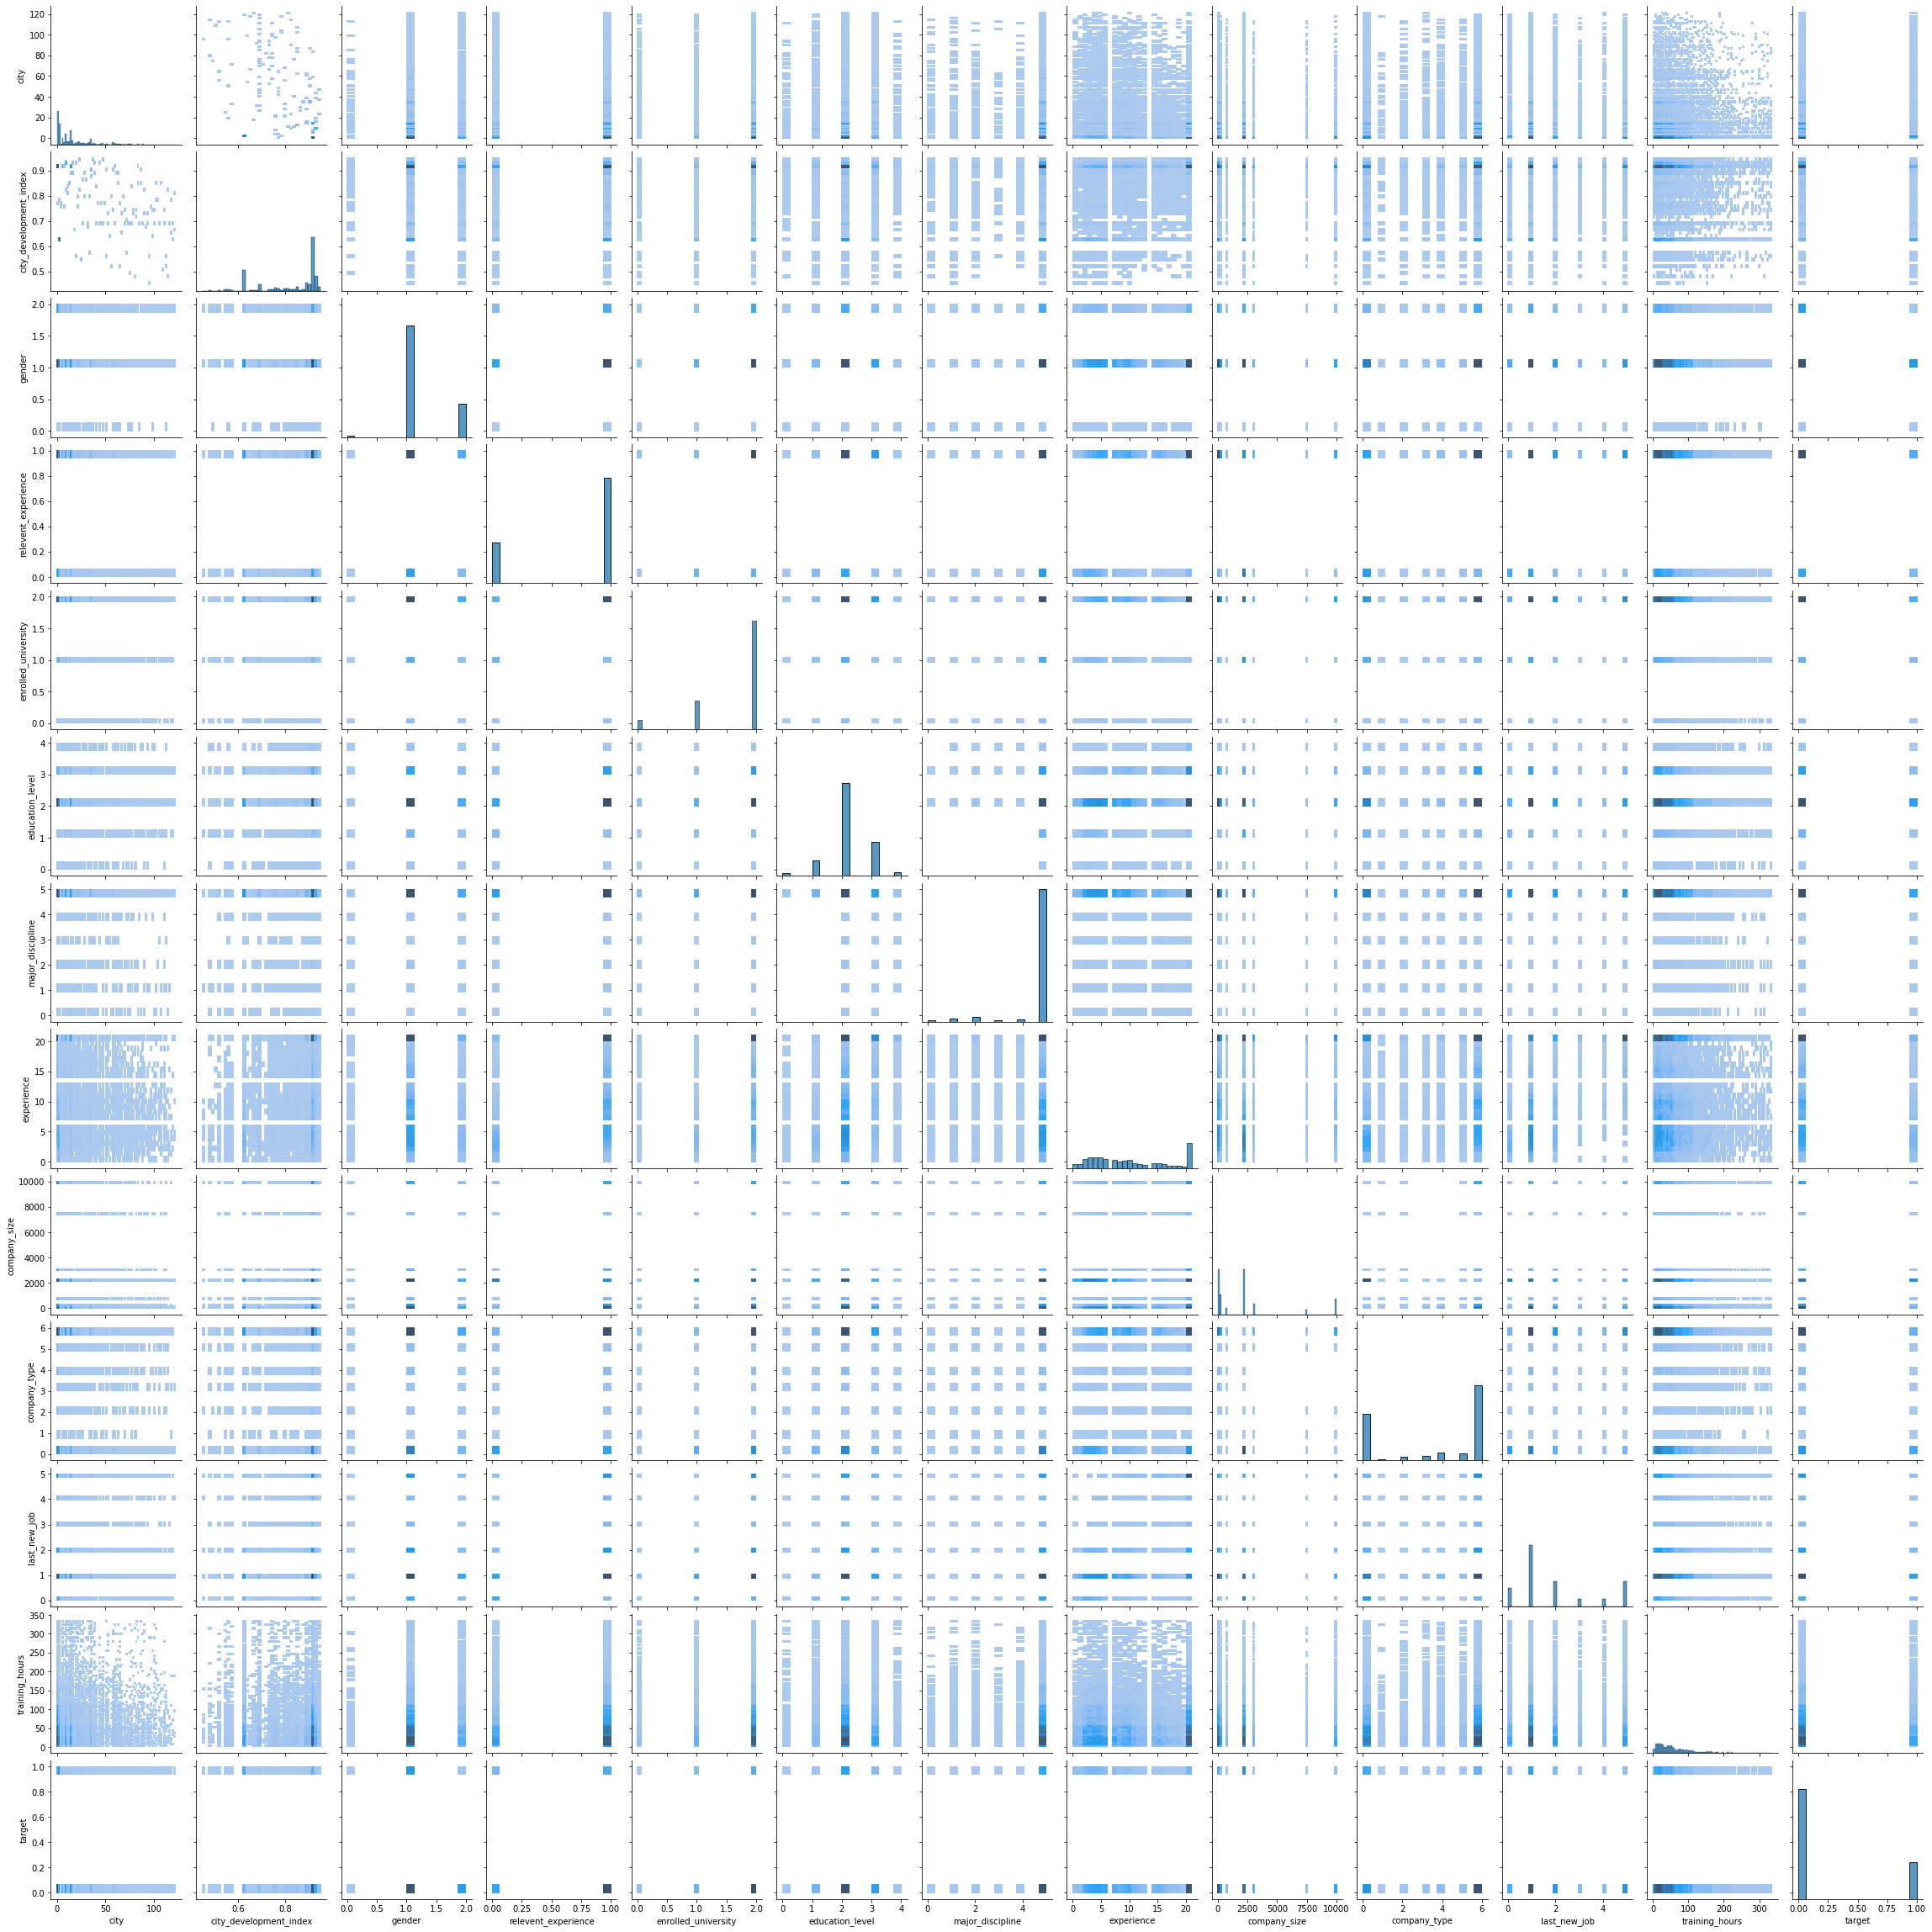

In [85]:
sns.pairplot(data=df_train,kind='hist')

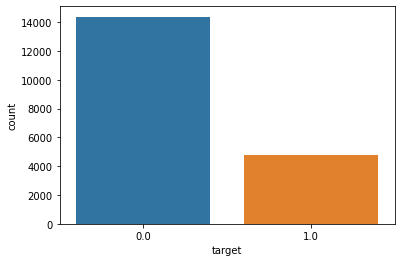

In [86]:
sns.countplot(data=df_train, x='target')
plt.show()

## Target needs Balancing

The dataset is unbalanced. This may adversely affect our prediction accuracy. 

One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.

Instead, new samples can be synthesized from the existing samples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and creating a new sample at a point along that line.


Therefore using SMOTE to balance the target column.

## Using EvalML to search for best classifier

<AxesSubplot:xlabel='target', ylabel='count'>

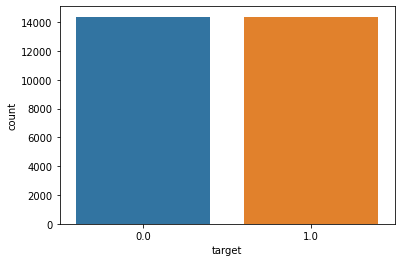

In [87]:
sns.countplot(data=pd.DataFrame(y), x='target')

In [88]:
y_eval=y.copy()
X_eval=X.copy()
X_eval, y_eval = SMOTE().fit_resample(X_eval, y_eval)
X_train_eval, X_test_eval, y_train_eval, y_test_eval = evalml.preprocessing.split_data(X_eval, y_eval, problem_type='binary')

<AxesSubplot:xlabel='target', ylabel='count'>

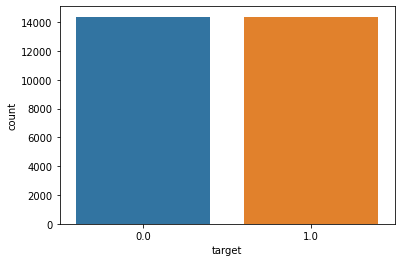

In [89]:
sns.countplot(data=pd.DataFrame(y_eval), x='target')

In [90]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train_eval, y_train=y_train_eval, problem_type='binary')
automl.search()

Using default limit of max_batches=1.

Generating pipelines to search over...

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Log Loss Binary. 
Lower score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 1 batches for a total of 9 pipelines. 
Allowed model families: lightgbm, linear_model, random_forest, catboost, xgboost, extra_trees, decision_tree



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 17.270

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.693
Decision Tree Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.472
Random Forest Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.410
LightGBM Classifier w/ Imputer:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.291
Logistic Regression Classifier w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.523
XGBoost Classifier w/ Imputer:
	Starting cross validation
	Fin

In [91]:
automl.rankings

,id,pipeline_name,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Imputer,0.291221,0.002276,0.290941,98.313754,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,6,XGBoost Classifier w/ Imputer,0.295888,0.001307,0.296252,98.286731,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,3,Random Forest Classifier w/ Imputer,0.410044,0.001158,0.411148,97.625742,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,2,Decision Tree Classifier w/ Imputer,0.471539,0.014048,0.474058,97.269672,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,7,Extra Trees Classifier w/ Imputer,0.507950,0.001822,0.506954,97.058839,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,Logistic Regression Classifier w/ Imputer + St...,0.523327,0.001408,0.522518,96.969806,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,8,CatBoost Classifier w/ Imputer,0.602596,0.000465,0.602060,96.510816,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Elastic Net Classifier w/ Imputer + Standard S...,0.693162,0.000010,0.693172,95.986420,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,17.270405,0.001069,17.269788,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [92]:
pipeline = automl.best_pipeline
pipeline

BinaryClassificationPipeline(parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9},})

In [93]:
automl.describe_pipeline(automl.rankings.iloc[2]["id"])


***************************************
* Random Forest Classifier w/ Imputer *
***************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.7 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.411       0.693 0.910      0.852 0.846                     0.847            0.847                           0.477     15,339        7,670
1                      0.409       0.702 0.912      0.860 0.849                     0.851            0.851               

In [94]:
automl.describe_pipeline(automl.rankings.iloc[1]["id"])


*********************************
* XGBoost Classifier w/ Imputer *
*********************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100

Training
Training for binary problems.
Total training time (including CV): 4.7 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.296       0.758 0.941      0.891 0.877                     0.879            0.879                           0.475     15,339        7,670
1                      0.294       0.768 0.941      0.897 0.882                     0.884            0.884                      

In [95]:
automl.describe_pipeline(automl.rankings.iloc[4]["id"])


*************************************
* Extra Trees Classifier w/ Imputer *
*************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.5 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.507       0.599 0.870      0.786 0.804                     0.799            0.799                           0.490     15,339        7,670
1                      0.510       0.613 0.875

In [96]:
automl.describe_pipeline(automl.rankings.iloc[5]["id"])


***************************************************************
* Logistic Regression Classifier w/ Imputer + Standard Scaler *
***************************************************************

Problem Type: binary
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Logistic Regression Classifier
	 * penalty : l2
	 * C : 1.0
	 * n_jobs : -1
	 * multi_class : auto
	 * solver : lbfgs

Training
Training for binary problems.
Total training time (including CV): 6.7 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary  Sensitivity at Low Alert Rates # Training # Validation
0                      0.523       0.512 0.821      0.757 0.755                     0.756            0.756                           0.477     15,339        7,670
1

## Applying High Accuracy Classifiers 

In [97]:
estimators = {
    'Logistic Regression': [LogisticRegression(penalty='l2',C=1.0,n_jobs=-1,multi_class='auto',solver='lbfgs')],
    'Decision Tree' :[DecisionTreeClassifier(criterion='gini',max_features='auto', max_depth=6,
                                             min_samples_split=2,min_weight_fraction_leaf=0.0)],
    'Random Forest' :[RandomForestClassifier(n_estimators=100,max_depth=6, n_jobs=-1)],
    'XG Boost': [XGBClassifier(eta=0.1,max_depth=6,min_child_weight=1,n_estimators=100)],
    'LightGBM': [LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=100,
                                max_depth=0, num_leaves=31, min_child_samples=20, n_jobs=-1,
                                bagging_freq=0, bagging_fraction=0.9)]
}


def mfit(estimators, X_train, y_train):
    for m in estimators:
        estimators[m][0].fit(X_train, y_train)
        print(m+' fitted')

In [98]:
mfit(estimators, X_train, y_train)

Logistic Regression fitted
Decision Tree fitted
Random Forest fitted
XG Boost fitted
LightGBM fitted


In [99]:
def mpredict(estimators, X_test, y_test):
    outcome = dict()
    r_a_score = dict()
    for m in estimators:
        y_pred = estimators[m][0].predict(X_test)
        r_a_score[m] = roc_auc_score(y_test, y_pred)
        outcome[m] = [y_pred, confusion_matrix(y_pred,y_test), classification_report(y_pred,y_test)]
    return outcome, r_a_score

In [100]:
outcome, r_a_score = mpredict(estimators, X_test, y_test)

------------------------Logistic Regression------------------------


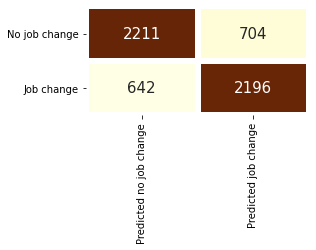

              precision    recall  f1-score   support

         0.0       0.77      0.76      0.77      2915
         1.0       0.76      0.77      0.77      2838

    accuracy                           0.77      5753
   macro avg       0.77      0.77      0.77      5753
weighted avg       0.77      0.77      0.77      5753

------------------------Decision Tree------------------------


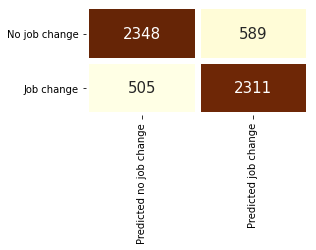

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      2937
         1.0       0.80      0.82      0.81      2816

    accuracy                           0.81      5753
   macro avg       0.81      0.81      0.81      5753
weighted avg       0.81      0.81      0.81      5753

------------------------Random Forest------------------------


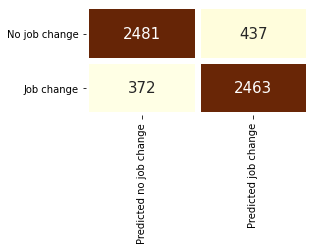

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      2918
         1.0       0.85      0.87      0.86      2835

    accuracy                           0.86      5753
   macro avg       0.86      0.86      0.86      5753
weighted avg       0.86      0.86      0.86      5753

------------------------XG Boost------------------------


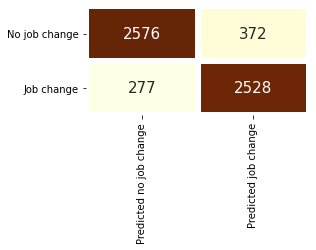

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      2948
         1.0       0.87      0.90      0.89      2805

    accuracy                           0.89      5753
   macro avg       0.89      0.89      0.89      5753
weighted avg       0.89      0.89      0.89      5753

------------------------LightGBM------------------------


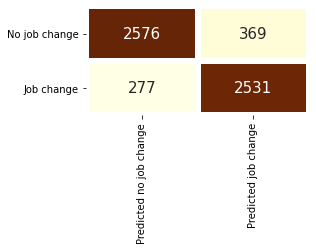

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      2945
         1.0       0.87      0.90      0.89      2808

    accuracy                           0.89      5753
   macro avg       0.89      0.89      0.89      5753
weighted avg       0.89      0.89      0.89      5753



In [101]:
for m in outcome:
    print('------------------------'+m+'------------------------')
    plt.figure(figsize = (4, 2))
    sns.heatmap(outcome[m][1], cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['No job change', 'Job change'], xticklabels = ['Predicted no job change', 'Predicted job change'])
    plt.yticks(rotation = 0)
    plt.show()
    print(outcome[m][2])

In [102]:
print('roc_auc_score')
for m in r_a_score:
    print('------------------------'+m+'------------------------')
    print(r_a_score[m])

roc_auc_score
------------------------Logistic Regression------------------------
0.7661075455962871
------------------------Decision Tree------------------------
0.8099449460338181
------------------------Random Forest------------------------
0.8594606403422893
------------------------XG Boost------------------------
0.8873166781488331
------------------------LightGBM------------------------
0.8878339195281434


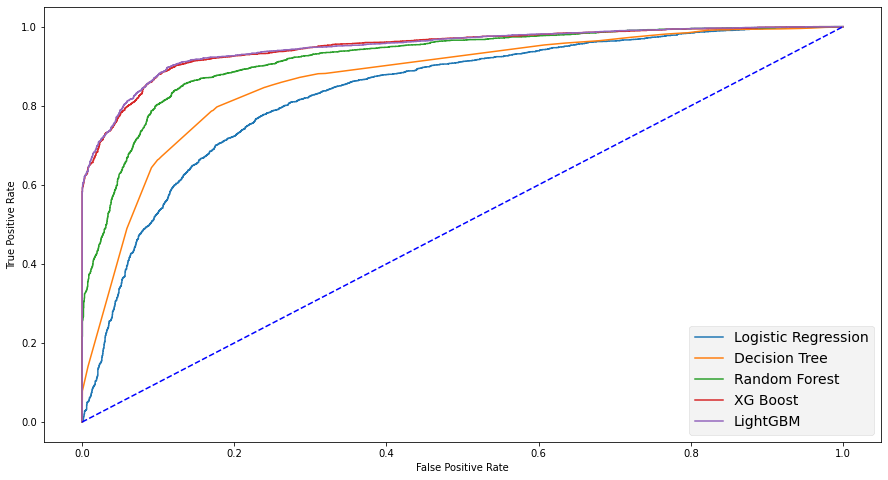

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)

for i in estimators:
    y_pred = estimators[i][0].predict_proba(X_test)
    fp_rate, tp_rate, _ = roc_curve(y_test, y_pred[:,1].ravel())
    plt.plot(fp_rate,tp_rate, label=i)
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'b')
plt.ylabel('True Positive Rate')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show()

In [104]:
log_reg=estimators['Logistic Regression'][0]
lgbm=estimators['LightGBM'][0]
xgb=estimators['XG Boost'][0]
rf=estimators['Random Forest'][0]
dt=estimators['Decision Tree'][0]

In [105]:
print(log_reg)
print(lgbm)
print(xgb)
print(rf)
print(dt)

LogisticRegression(n_jobs=-1)
LGBMClassifier(bagging_fraction=0.9, bagging_freq=0, max_depth=0)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
RandomForestClassifier(max_depth=6, n_jobs=-1)
DecisionTreeClassifier(max_depth=6, max_features='auto')


In [106]:
pickle.dump(rf, open('rf.pkl','wb'))
pickle.dump(dt, open('dt.pkl','wb'))
pickle.dump(log_reg, open('log_reg.pkl','wb'))
pickle.dump(lgbm, open('lgbm.pkl','wb'))
pickle.dump(xgb, open('xgb.pkl','wb'))

## Thanks for reading my kernel.
                                                                                                      By-
                                                                                                         Ritwik Shekhar         